IPL 2022 EDA Projects Using Python 

The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

These are some of the important columns that we'll focus on for meaningful insights in this project.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load Data Set
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [4]:
print(f'Your Rows Are {df.shape[0]} And Your Columns Are {df.shape[1]}')

Your Rows Are 74 And Your Columns Are 20


In [5]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

1. Which team won the most matches?


Text(0, 0.5, 'Team')

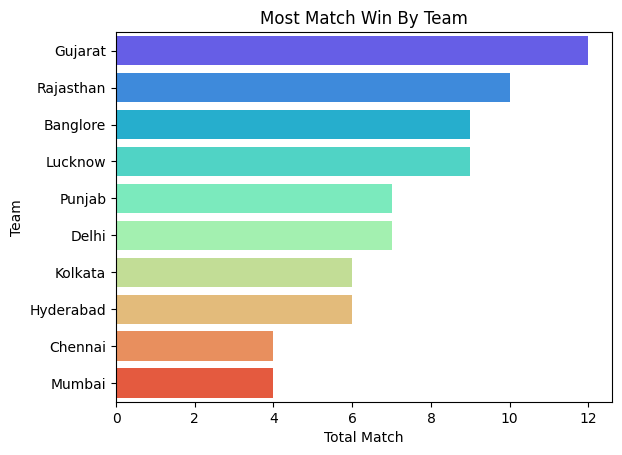

In [15]:
match_wins = df['match_winner'].value_counts()
sns.barplot(y=match_wins.index,x=match_wins.values,palette='rainbow')
plt.title('Most Match Win By Team')
plt.xlabel('Total Match')
plt.ylabel('Team')

2. Toss Decision Trends


Text(0.5, 1.0, 'Toss Decision Trends')

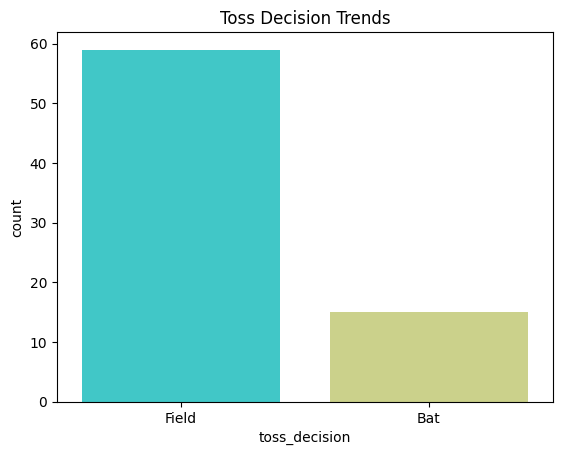

In [23]:
sns.countplot(x=df['toss_decision'],palette='rainbow')
plt.title('Toss Decision Trends')

3. Toss Winner vs Match Winner


In [39]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100)/ df.shape[0]
percentage.round(2)


np.float64(48.65)

4. How do teams win? (Runs vs Wickets)


Text(0.5, 1.0, 'Won By')

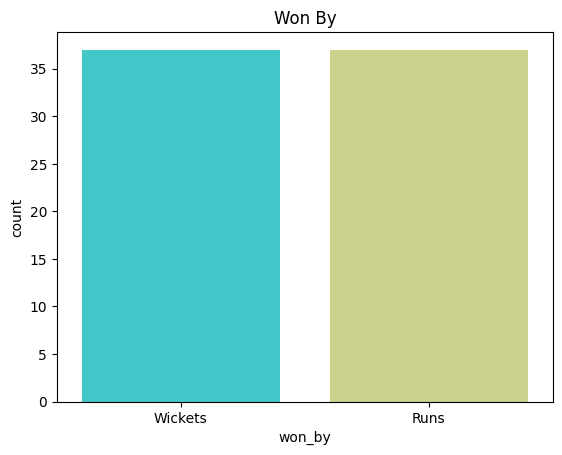

In [43]:
sns.countplot(x=df['won_by'],palette='rainbow')
plt.title('Won By')

Performance

1 Most "Player of the Match" Awards (Top 10)


Text(0.5, 1.0, 'top 10 Players With Most Man Of The Match')

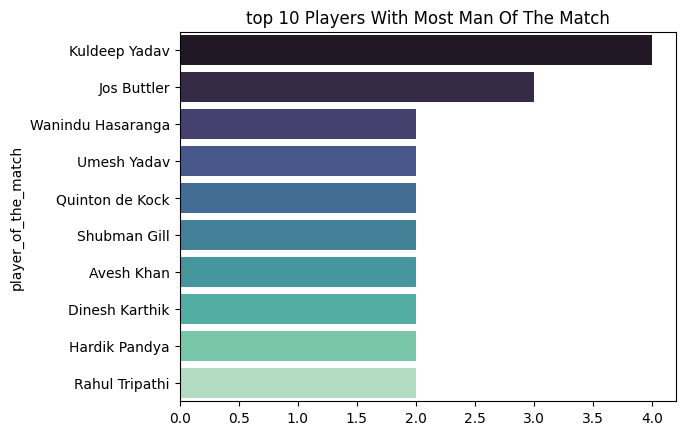

In [ ]:
players = df['player_of_the_match'].value_counts().head(10)
sns.barplot(y=players.index,x=players.values,palette='mako')
plt.title('top 10 Players With The Most Man Of The Match')

2 Top Scorers


Text(0.5, 1.0, 'Top 5 Plyers With The Most Runs')

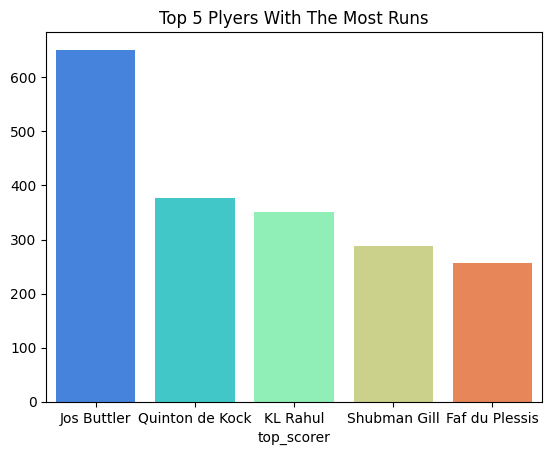

In [62]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=high.index,y=high.values,palette='rainbow')
plt.title('Top 5 Plyers With The Most Runs')

3.Best Bowling Figures 


Text(0.5, 1.0, 'Top 5 Pleyers With Most The Wickets')

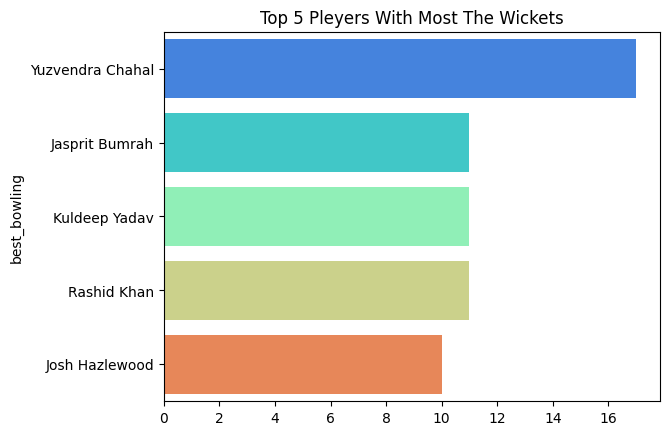

In [81]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x : x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
wickets = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(5)
sns.barplot(y=wickets.index,x=wickets.values,palette='rainbow')
plt.title('Top 5 Pleyers With Most The Wickets')


Venue Analysis


Most Played By Venue

<Axes: ylabel='venue'>

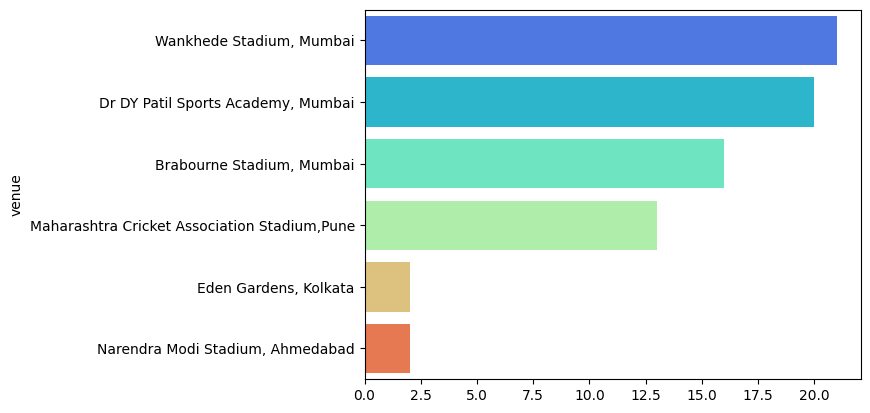

In [85]:
venue_count = df['venue'].value_counts()
sns.barplot(y=venue_count.index,x=venue_count.values,palette='rainbow')

Custom Questions & Insights


Q1: Which player had the highest individual score?


In [96]:
high_score = df.groupby('top_scorer')['highscore'].max().sort_values(ascending=False).head(1)
high_score

top_scorer
Quinton de Kock    140
Name: highscore, dtype: int64

Q2: Which bowler had the best bowling figures?

In [98]:
df[df['highest_wickets'] == df['highest_wickets']].max()[['best_bowling','best_bowling_figure']]

best_bowling           Yuzvendra Chahal
best_bowling_figure               5--40
dtype: object